In [1]:
import numpy as np
import pandas as pd

from sktime.transformations.series.acf import AutoCorrelationTransformer, PartialAutoCorrelationTransformer
from sktime.utils.plotting import plot_correlations

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
y = web.DataReader(name='WTB3MS', data_source='fred', start='2000-01-01')

In [3]:
y

,WTB3MS
DATE,
2000-01-07,5.26
2000-01-14,5.26
2000-01-21,5.31
2000-01-28,5.41
2000-02-04,5.50
...,...
2025-03-07,4.20
2025-03-14,4.20
2025-03-21,4.20


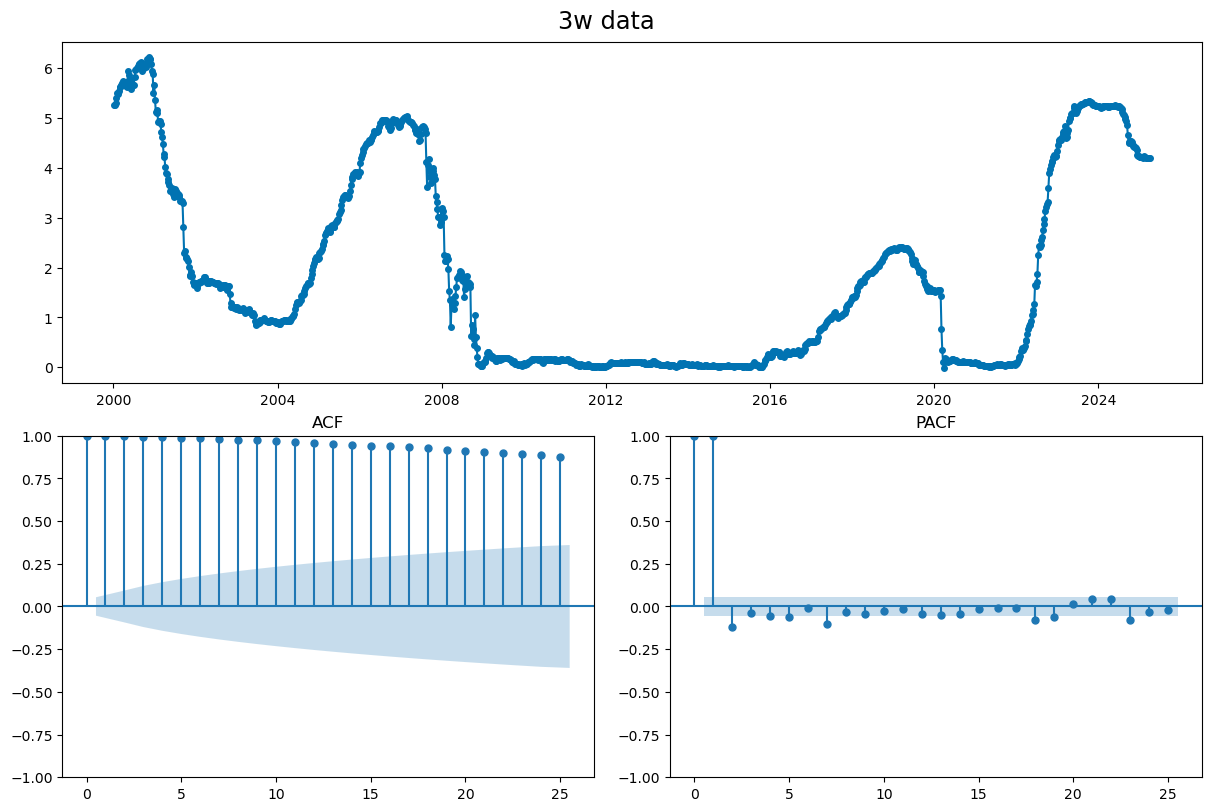

In [4]:
plot_correlations(y, lags=25, zero_lag=True, alpha=0.05, suptitle='3w data', acf_title='ACF', pacf_title='PACF')

plt.show()

In [5]:
acf_transformer = AutoCorrelationTransformer(n_lags=5)
acf_transformer.fit_transform(y)

,WTB3MS
0,1.000000
1,0.997299
2,0.994146
3,0.990792
4,0.987183
5,0.983282


In [6]:
pacf_transformer = PartialAutoCorrelationTransformer(n_lags=5)
pacf_transformer.fit_transform(y)

,WTB3MS
0,1.000000
1,0.998056
2,-0.118227
3,-0.040731
4,-0.058682
5,-0.063305


In [7]:
from sktime.forecasting.arima import ARIMA, AutoARIMA
# from sktime.forecasting.arima import StatsModelsARIMA
# from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)


In [8]:
forecaster = AutoARIMA(information_criterion='bic', test='kpss', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'ma.L1': -0.7919880392243751,
 'ma.L2': -0.14823186847941844,
 'sigma2': 0.006171378461710868,
 'order': (0, 2, 2),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -2952.7576370267693,
 'aicc': -2952.7393443438423,
 'bic': -2937.2105806911136,
 'hqic': -2946.9278754971806}

In [9]:
from sktime.param_est.stationarity import StationarityADF, StationarityKPSS, StationarityDFGLS, \
	StationarityPhillipsPerron, StationarityADFArch, StationarityKPSSArch
# Не показывать InterpolationWarning из statsmodels
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', category=InterpolationWarning)

In [10]:
forecaster = ARIMA(order=(0,2,2), trend='n')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1318
Model:               SARIMAX(0, 2, 2)   Log Likelihood                1479.379
Date:                Sat, 12 Apr 2025   AIC                          -2952.758
Time:                        20:00:46   BIC                          -2937.211
Sample:                    01-07-2000   HQIC                         -2946.928
                         - 04-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7920      0.008    -95.177      0.000      -0.808      -0.776
ma.L2         -0.1482      0.010    -14.632      0.000      -0.168      -0.128
sigma2         0.0062   5.52e-05    111.759      0.000       0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             86634.19
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -1.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
npy = np.log(y)

In [12]:
npy

,WTB3MS
2000-01-07,1.660131
2000-01-14,1.660131
2000-01-21,1.669592
2000-01-28,1.688249
2000-02-04,1.704748
...,...
2025-03-07,1.435085
2025-03-14,1.435085
2025-03-21,1.435085
2025-03-28,1.435085


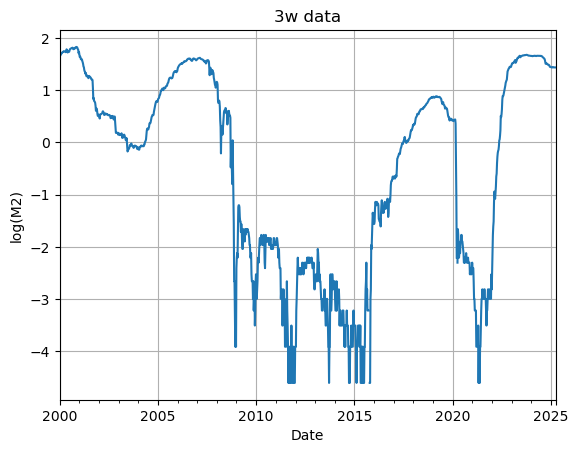

In [13]:
ax = npy.plot(title='3w data')

# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('log(M2)')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [14]:
npy = npy.dropna()

In [15]:
sty_est = StationarityADFArch(trend='ct', method='bic', p_threshold=0.05)
sty_est.fit(y) 
sty_est.get_fitted_params()["stationary"]

False

In [16]:
# полный протокол теста
sty_est.get_fitted_params()

{'stationary': False, 'test_statistic': -1.7035324331905608, 'used_lag': 6}

In [17]:
sty_est = StationarityKPSS(p_threshold=0.05, regression='ct')
sty_est.fit(y)
sty_est.get_fitted_params()["stationary"]

False

In [18]:
# полный протокол теста
sty_est.get_fitted_params()

{'lags': 21,
 'pvalue': 0.01,
 'stationary': False,
 'test_statistic': 0.7233544851250886}

In [19]:
forecaster.get_fitted_params()

{'ma.L1': -0.7919880392243751,
 'ma.L2': -0.14823186847941844,
 'sigma2': 0.006171378461710868,
 'aic': -2952.7576370267693,
 'aicc': -2952.7393443438423,
 'bic': -2937.2105806911136,
 'hqic': -2946.9278754971806}

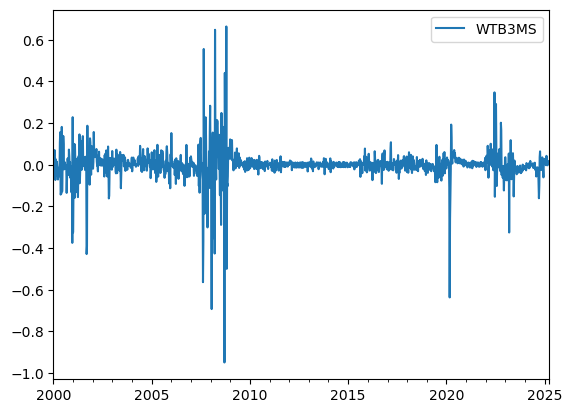

In [20]:
forecaster.predict_residuals(y).plot()

plt.show()

In [21]:
forecaster.predict_residuals(y)

,WTB3MS
2000-01-07,NaN
2000-01-14,NaN
2000-01-21,0.050000
2000-01-28,0.070452
2000-02-04,0.032212
...,...
2025-03-07,0.018820
2025-03-14,0.014543
2025-03-21,0.014307
2025-03-28,0.013487


In [22]:
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

In [23]:
acorr_ljungbox(forecaster.predict_residuals(y).dropna() , lags=[7], model_df=2+2)

,lb_stat,lb_pvalue
7,36.320619,6.406089e-08


In [24]:
lm_stat, lm_pval, f_stat, f_pval = het_arch(forecaster.predict_residuals(y).dropna(), nlags=7, ddof=2+2)

lm_stat, lm_pval

(160.57819546007434, 2.423908177105638e-31)

In [25]:
forecaster = ARIMA(order=(0,2,2), trend='n')
# зададим горизонт прогнозирования и частотность
fh = ForecastingHorizon(np.arange(1,11), freq ='W-Fri')

y_pred = forecaster.fit_predict(y=y, fh=fh)
y_pred

,WTB3MS
2025-04-11,4.187861
2025-04-18,4.173825
2025-04-25,4.159789
2025-05-02,4.145753
2025-05-09,4.131716
2025-05-16,4.117680
2025-05-23,4.103644
2025-05-30,4.089607
2025-06-06,4.075571
2025-06-13,4.061535


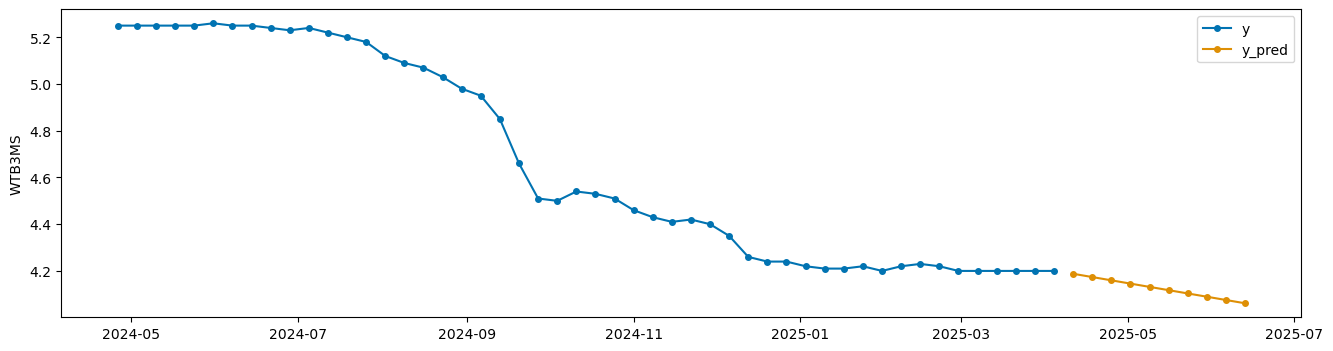

In [26]:
plot_series(y.tail(50), y_pred, labels=['y', 'y_pred'])

plt.show()

In [27]:
conf_int = forecaster.predict_interval(fh=fh, coverage=0.9)
conf_int

WTB3MS          
                 0.9          
               lower     upper
2025-04-11  4.058645  4.317078
2025-04-18  3.971186  4.376464
2025-04-25  3.899213  4.420364
2025-05-02  3.833779  4.457726
2025-05-09  3.771904  4.491528
2025-05-16  3.712179  4.523181
2025-05-23  3.653814  4.553473
2025-05-30  3.596323  4.582892
2025-06-06  3.539381  4.611762
2025-06-13  3.482762  4.640307

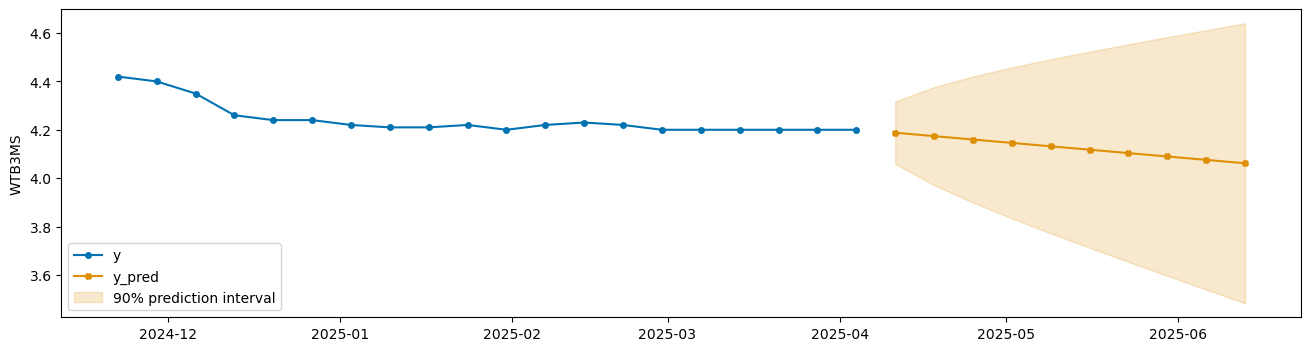

In [28]:
plot_series(y.tail(20), y_pred, labels=['y', 'y_pred'], markers=['o', 'X'], pred_interval=conf_int)

plt.show()